In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('SampleSuperstore.csv')

In [11]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.1000,5,0.00,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932


In [13]:
data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9993,9993,9993,9993,9993,9993.000000,9993,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5190,9993,915,2000,NaN,3202,6025,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55186.627539,NaN,NaN,NaN,229.856670,3.789753,0.156218,28.652464
std,NaN,NaN,NaN,NaN,NaN,32063.103801,NaN,NaN,NaN,623.276273,2.225149,0.206456,234.271411
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728000
50%,NaN,NaN,NaN,NaN,NaN,56301.000000,NaN,NaN,NaN,54.480000,3.000000,0.200000,8.662000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


array([[<Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'Profit'}>, <Axes: >]], dtype=object)

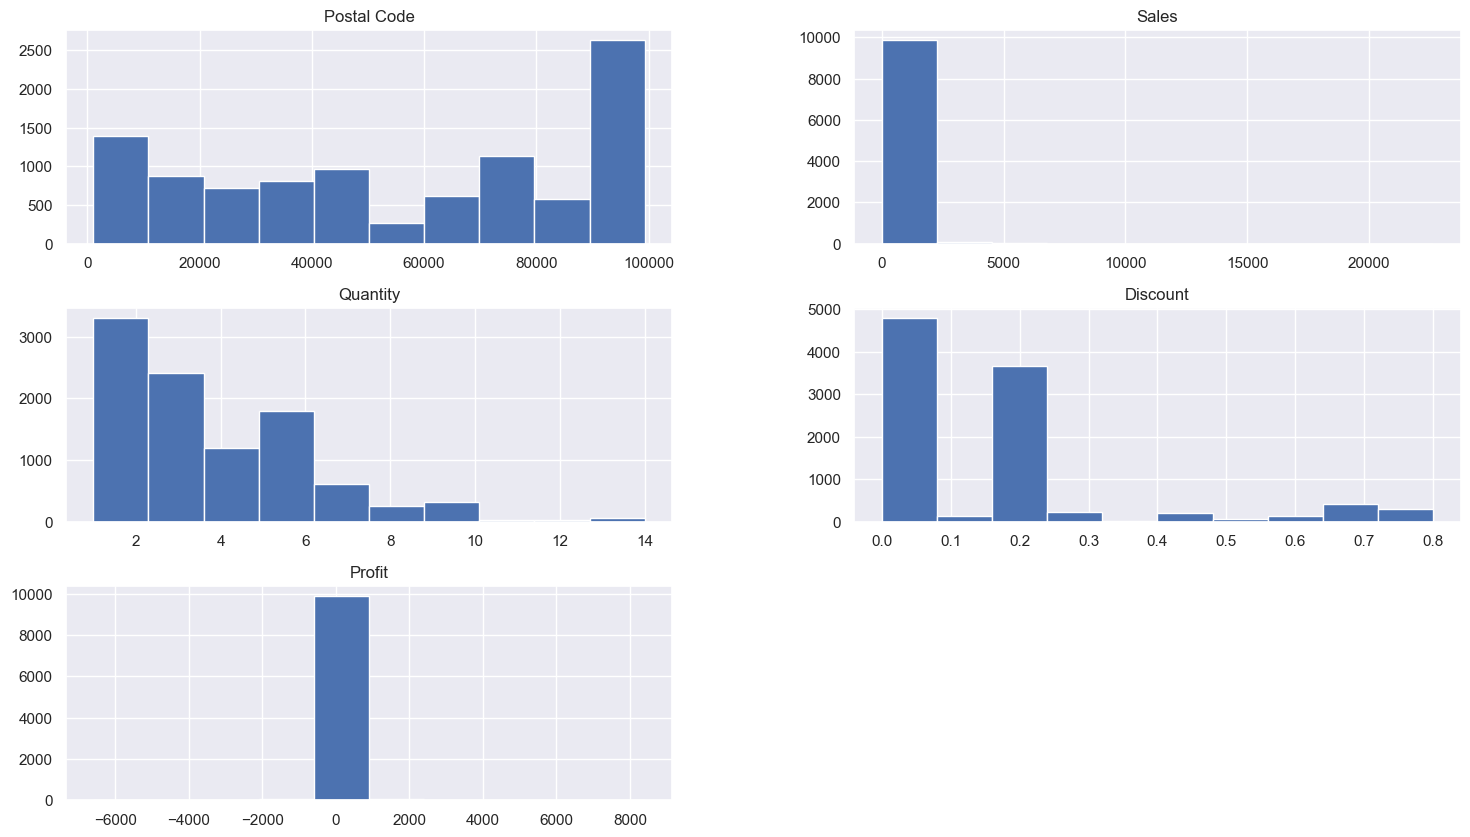

In [15]:
data.hist(bins=10, figsize=(18, 10))

<Axes: >

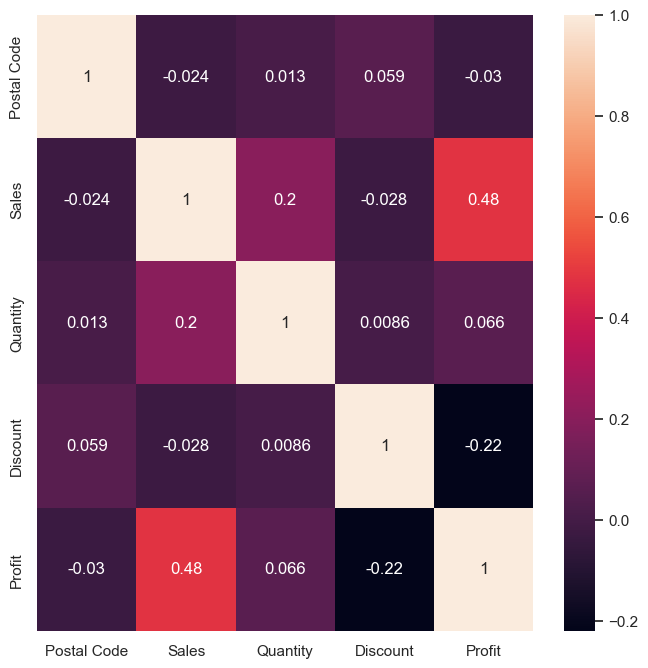

In [23]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8,8))
sns.heatmap(numerical_data.corr(), annot=True)

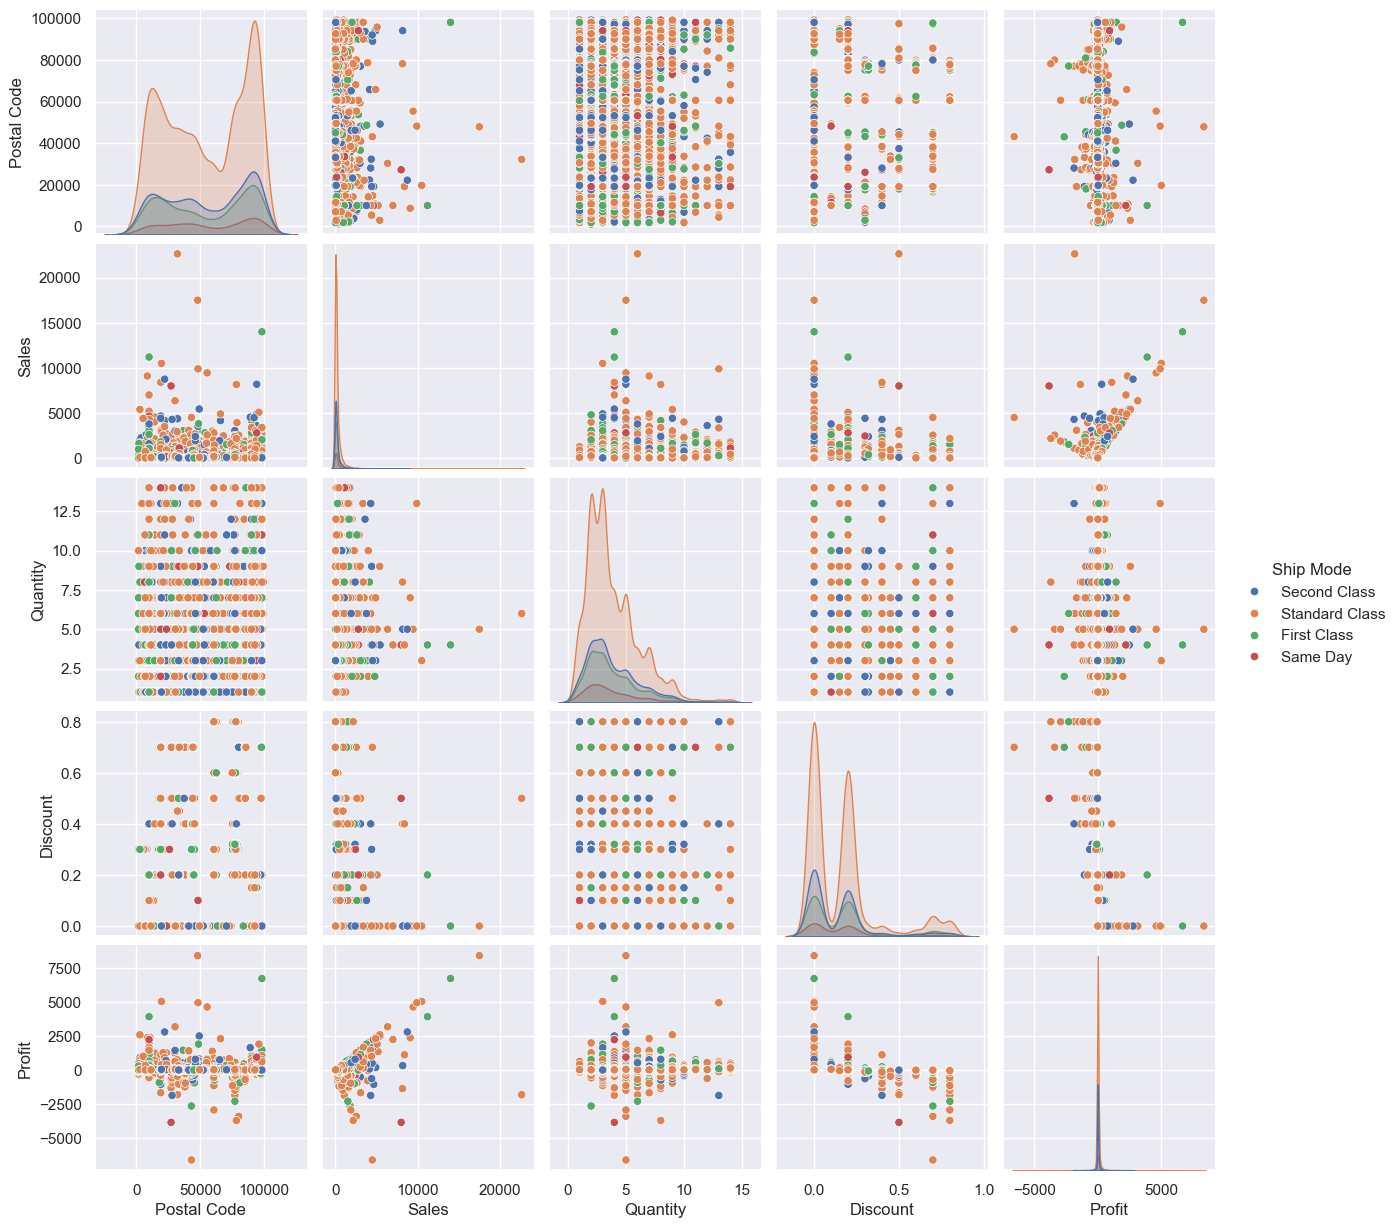

In [25]:
sns.pairplot(data, hue='Ship Mode')

<Axes: xlabel='Ship Mode', ylabel='count'>

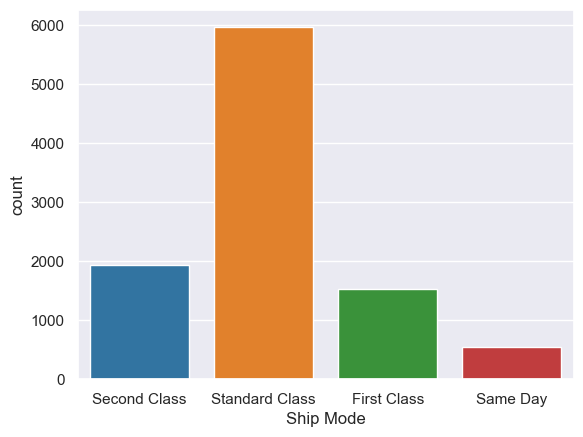

In [27]:
sns.countplot(x='Ship Mode', data=data, palette='tab10')

In [29]:
data_shipmode = data.groupby(['Ship Mode'])[['Sales', 'Profit', 'Discount']].mean()
data_shipmode

,Sales,Profit,Discount
Ship Mode,,,
First Class,228.497024,31.839948,0.164610
Same Day,236.396179,29.266591,0.152394
Second Class,236.085602,29.513214,0.138966
Standard Class,227.583067,27.494770,0.160023


In [31]:
colors_4 = ['magenta','yellow','orange','red']
colors_3 = ['green','blue','cyan']

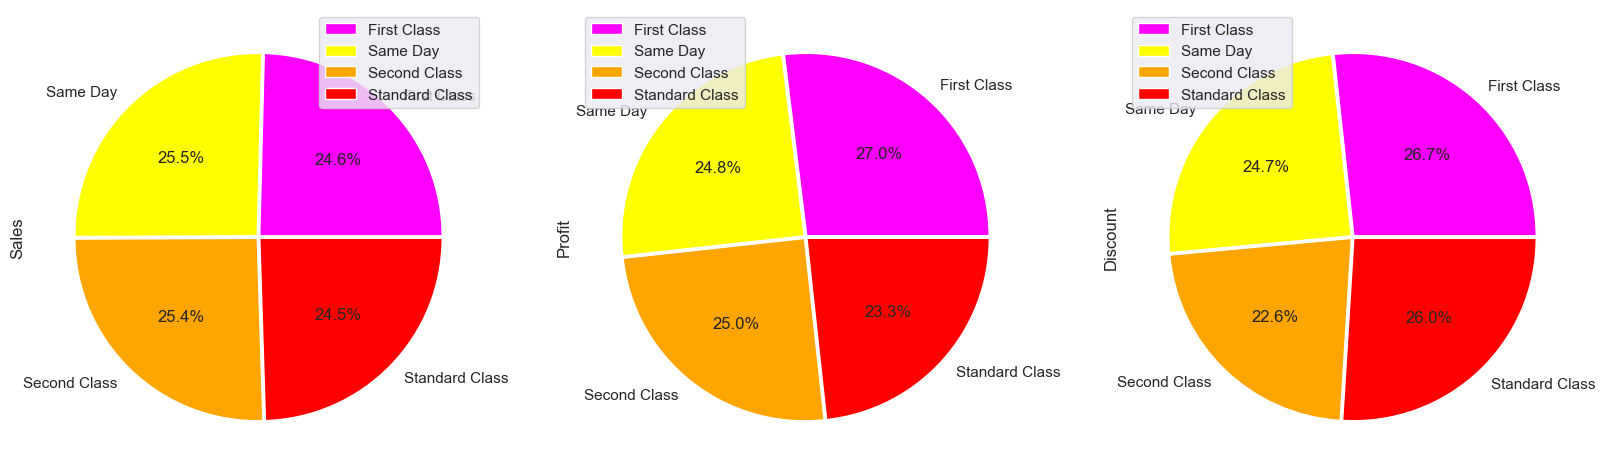

In [33]:
data_shipmode.plot.pie(subplots=True, figsize=(20,10), labels=data_shipmode.index, autopct='%1.1f%%', explode=(0.01,0.01,0.01,0.01), colors=colors_4)
plt.show()

<Axes: xlabel='Ship Mode'>

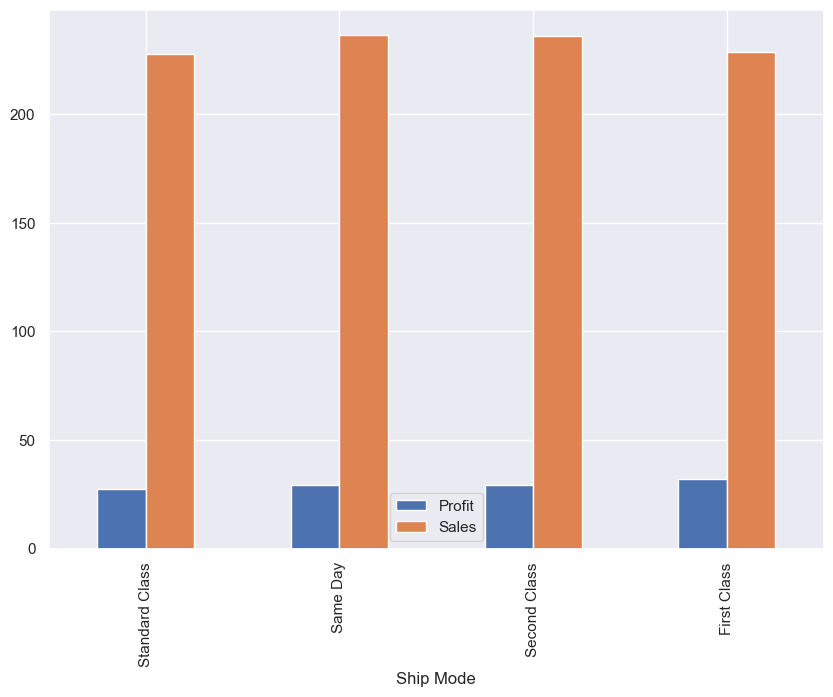

In [35]:
data_shipmode.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(10,7))

In [37]:
data_shipmode.sum(axis=0)

Sales       928.561871
Profit      118.114523
Discount      0.615993
dtype: float64

In [39]:
data_shipmode['Sales%'] = data_shipmode['Sales']/9.285
data_shipmode['Profit%']= data_shipmode['Profit']/1.181

In [41]:
data_shipmode.sort_values('Profit%')

,Sales,Profit,Discount,Sales%,Profit%
Ship Mode,,,,,
Standard Class,227.583067,27.494770,0.160023,24.510831,23.280923
Same Day,236.396179,29.266591,0.152394,25.460008,24.781195
Second Class,236.085602,29.513214,0.138966,25.426559,24.990020
First Class,228.497024,31.839948,0.164610,24.609265,26.960159


In [ ]:
#Analisis based on segmen

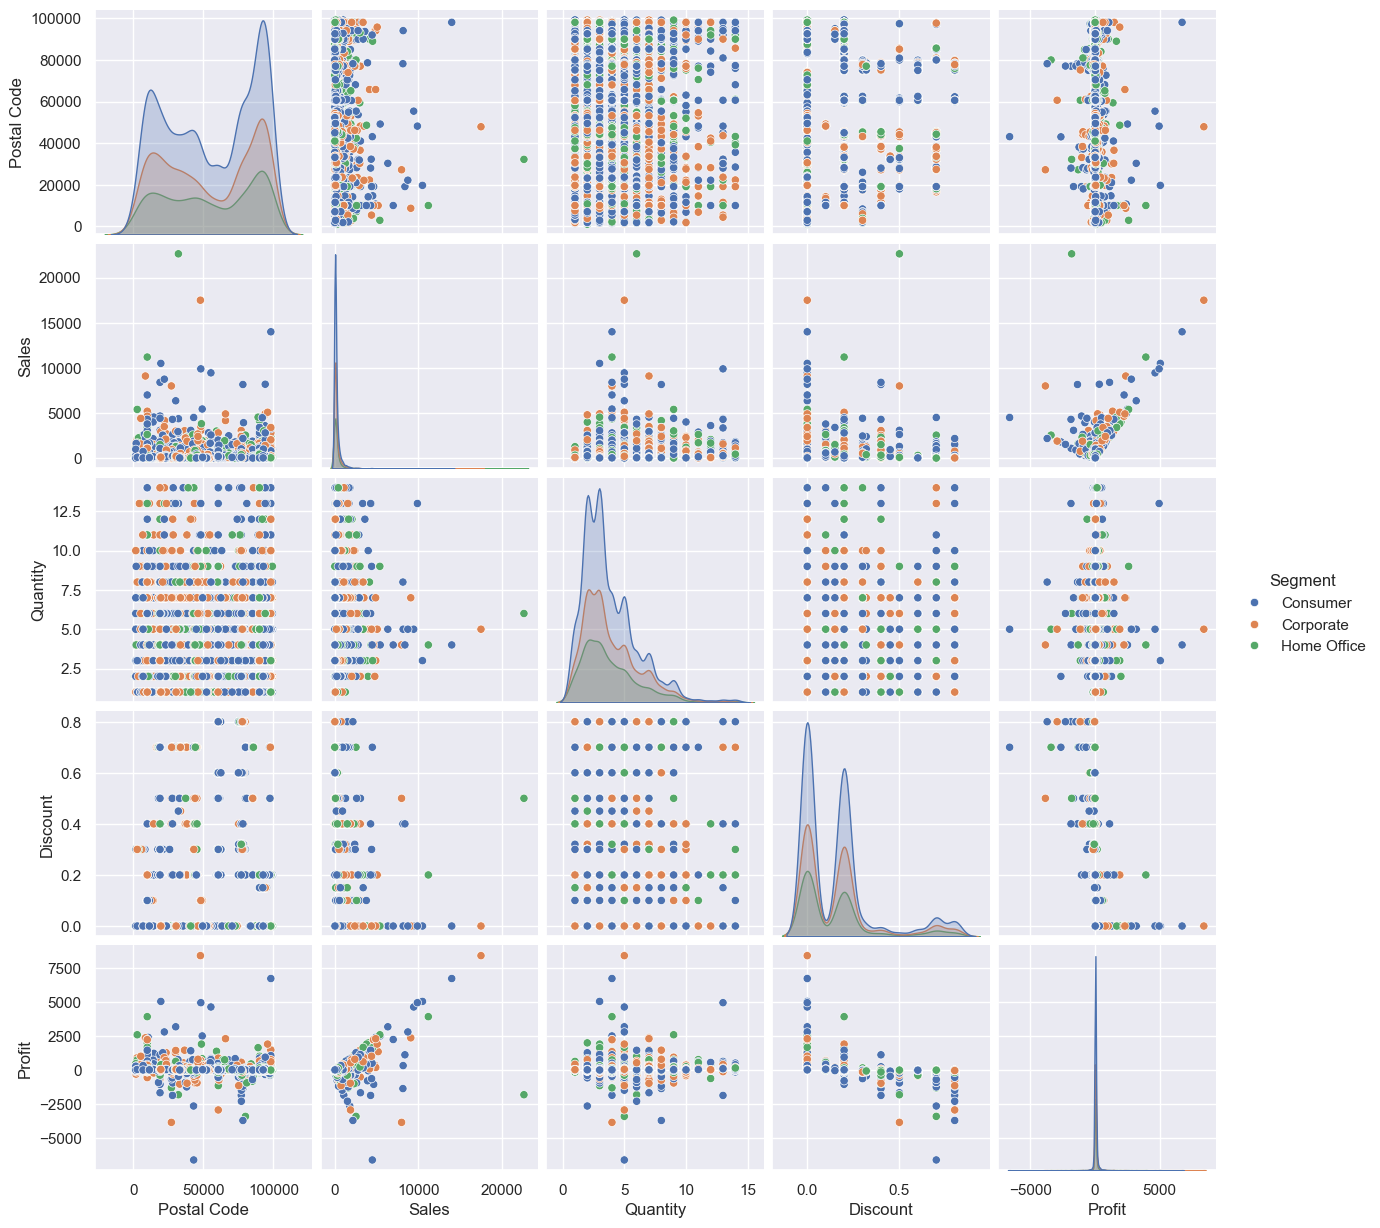

In [43]:
sns.pairplot(data, hue='Segment')

<Axes: xlabel='Segment', ylabel='count'>

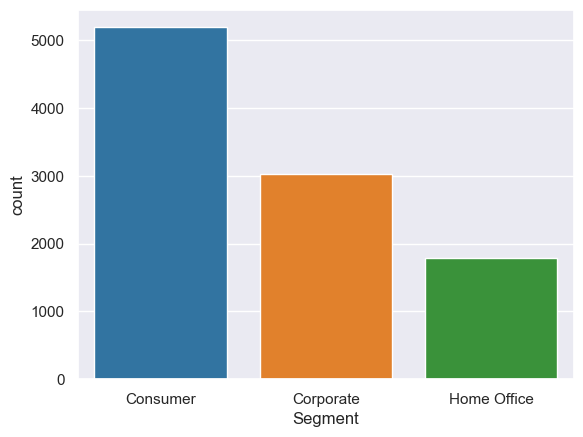

In [45]:
sns.countplot(x='Segment', data=data, palette='tab10')

In [47]:
data_segment = data.groupby(['Segment'])[['Sales', 'Profit', 'Discount']].mean()

array([<Axes: ylabel='Sales'>, <Axes: ylabel='Profit'>,
       <Axes: ylabel='Discount'>], dtype=object)

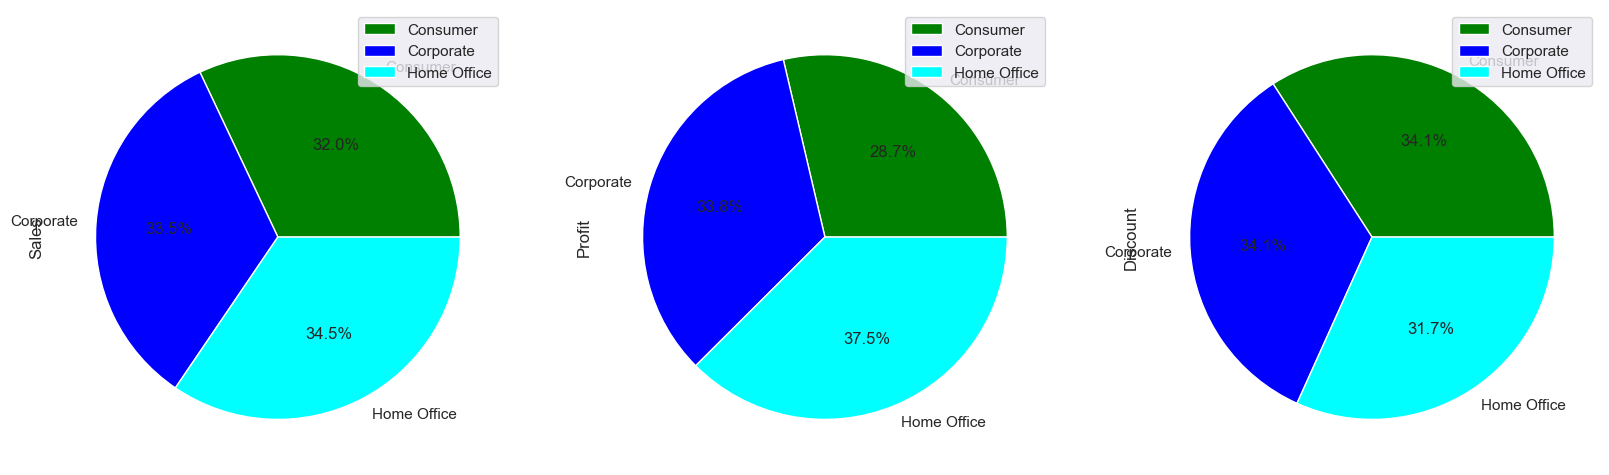

In [53]:
data_segment.plot.pie(subplots=True, figsize=(20,10), labels=data_segment.index, autopct='%1.1f%%', colors=colors_3)

<Axes: xlabel='Segment'>

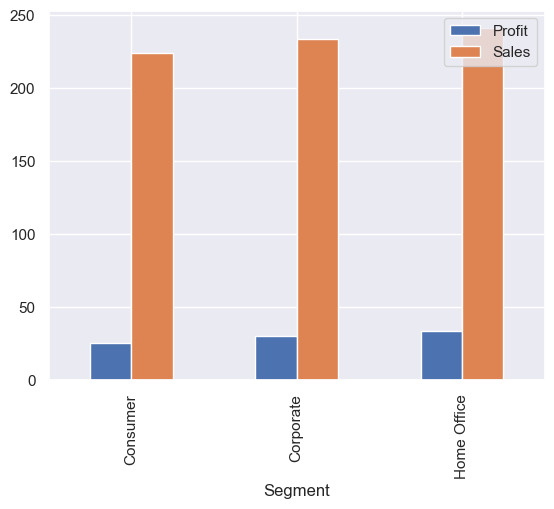

In [57]:
data_segment.sort_values('Profit')[['Profit','Sales']].plot(kind='bar')

In [59]:
data_segment.sum(axis=0)

Sales       698.525242
Profit       90.103127
Discount      0.463528
dtype: float64

In [61]:
data_segment['Sales%'] = data_segment['Sales']/6.985
data_segment['Profit%'] = data_segment['Profit']/0.9011

In [63]:
data_segment.sort_values('Profit')

,Sales,Profit,Discount,Sales%,Profit%
Segment,,,,,
Consumer,223.729901,25.827796,0.158171,32.030050,28.662519
Corporate,233.823300,30.456667,0.158228,33.475061,33.799431
Home Office,240.972041,33.818664,0.147128,34.498503,37.530423


In [ ]:
#Analysis base on state

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250')])

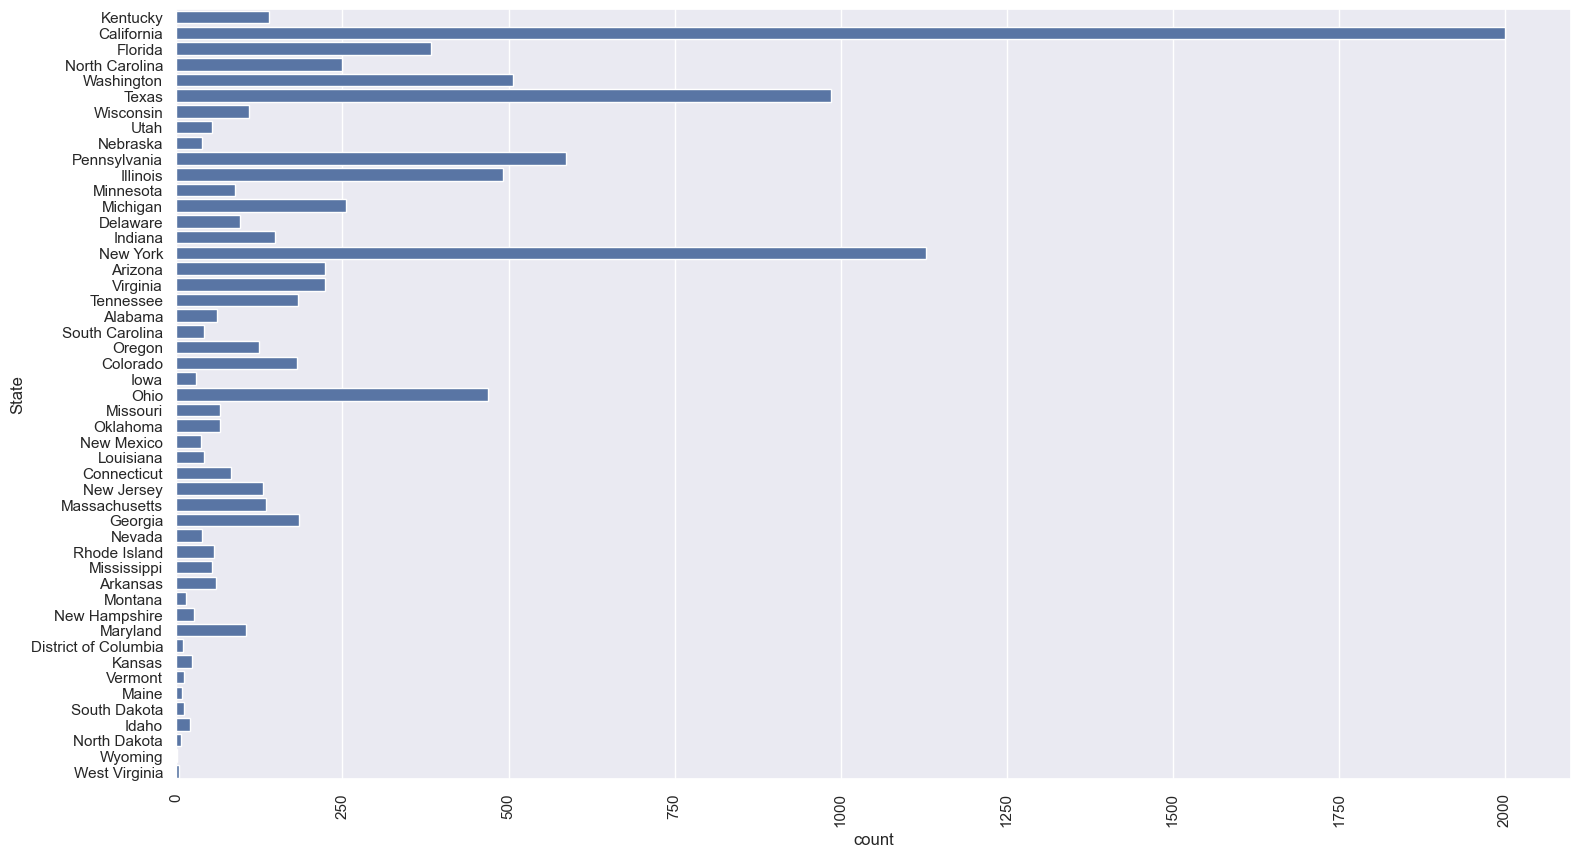

In [65]:
plt.figure(figsize=(18,10))
sns.countplot(data['State'])
plt.xticks(rotation=90)

In [67]:
data_state = data.groupby(['State'])[['Sales','Profit','Discount']].mean()

In [69]:
data_state1 = data_state.sort_values('Profit')

In [71]:
data_state2 = data_state.sort_values('Sales')

<Axes: xlabel='State'>

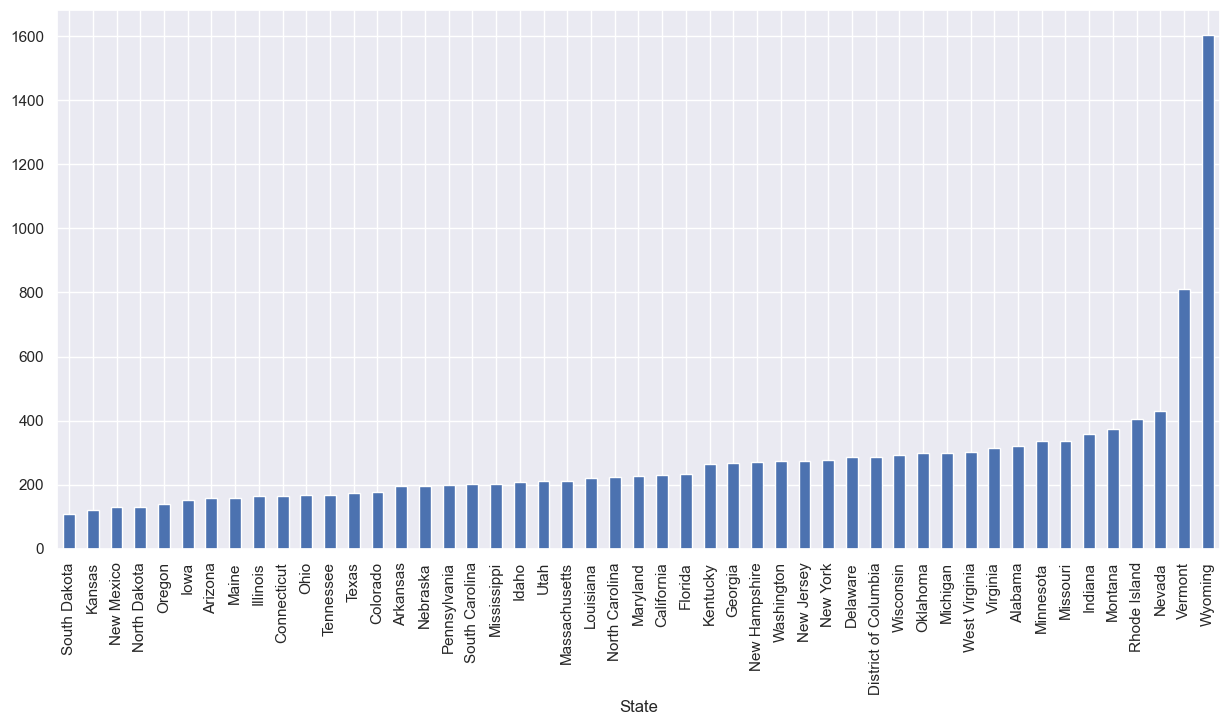

In [73]:
data_state2['Sales'].plot(kind='bar', figsize=(15,7))

<Axes: xlabel='State'>

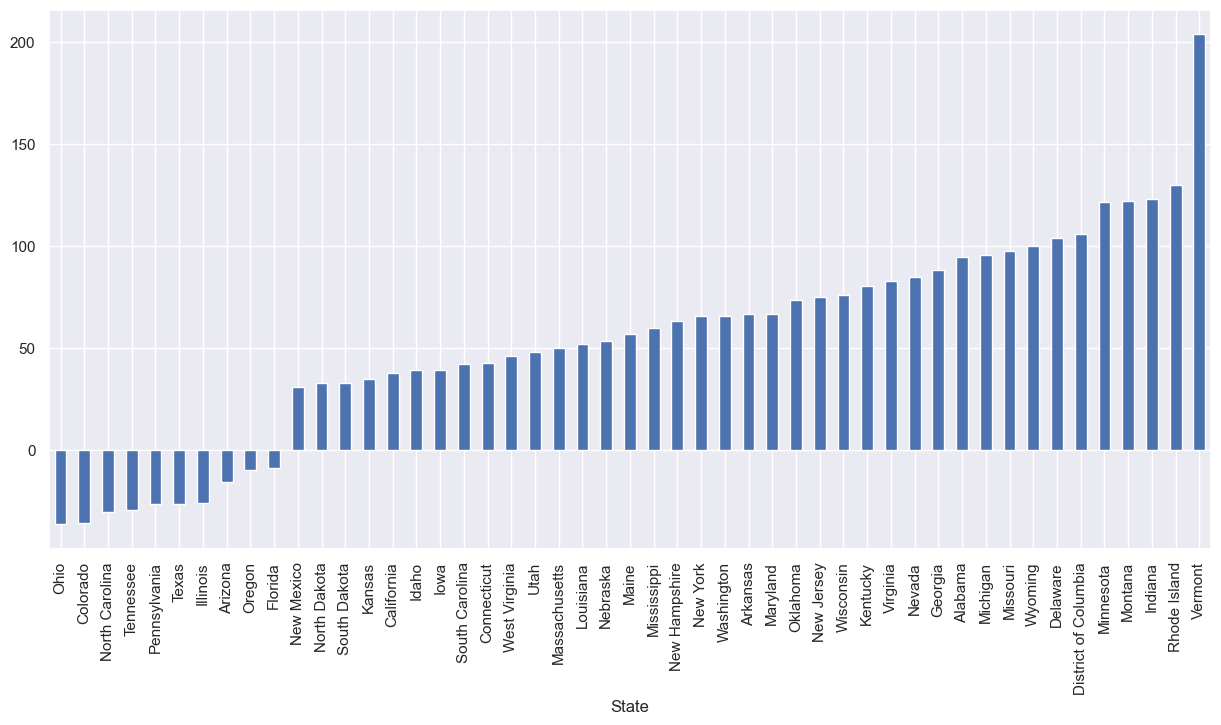

In [75]:
data_state1['Profit'].plot(kind='bar', figsize=(15,7))

<Axes: xlabel='State'>

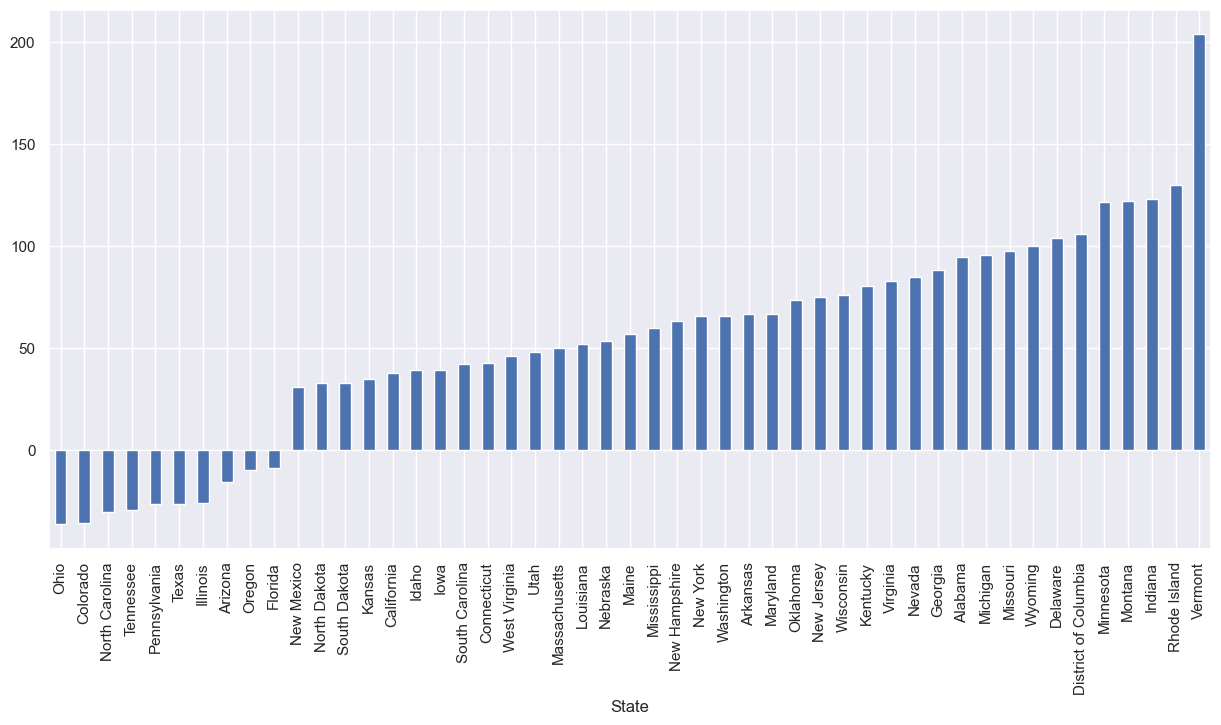

In [82]:
data_state.sort_values('Profit')['Profit'].plot(kind='bar', figsize=(15,7))

<Axes: xlabel='State'>

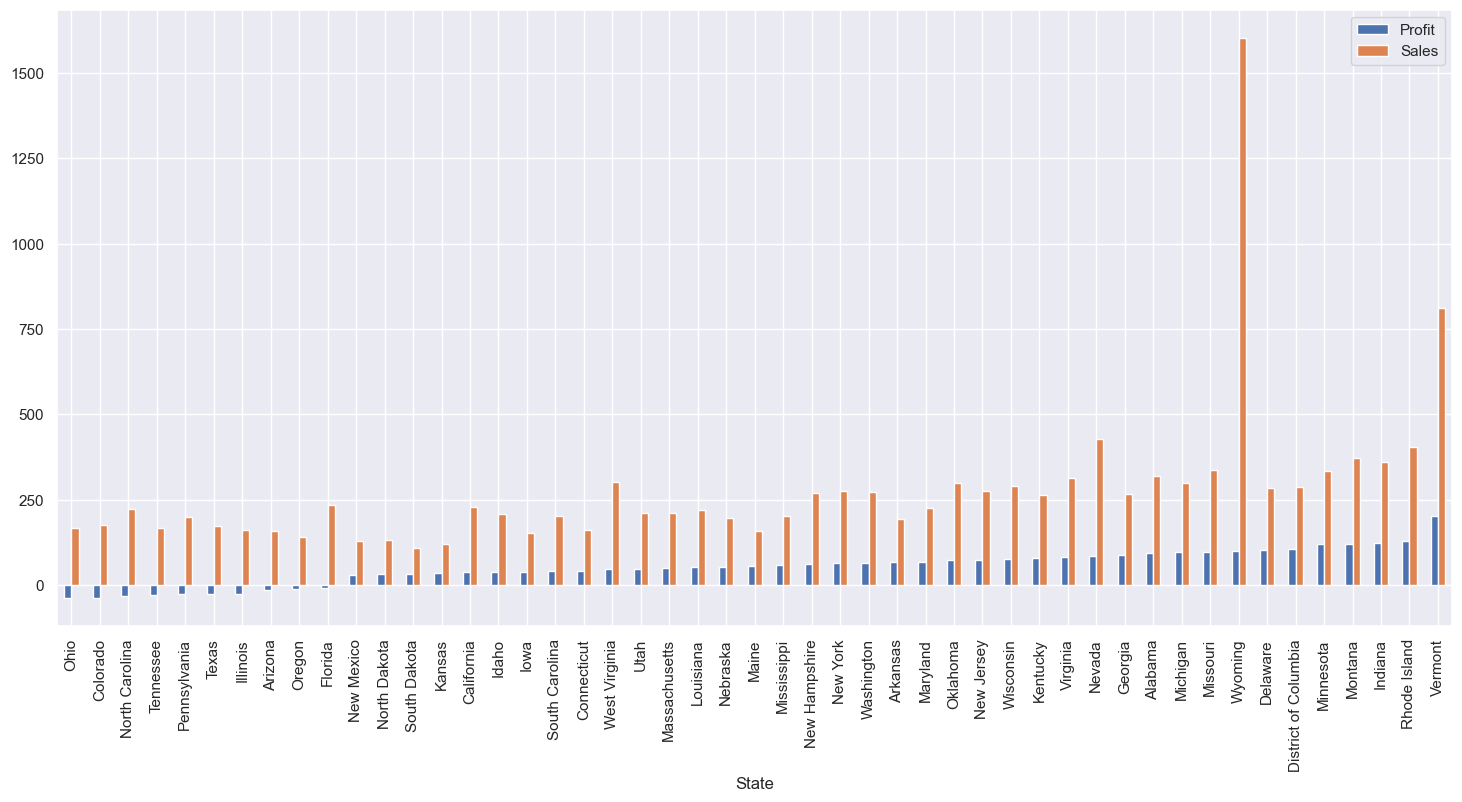

In [88]:
#sorted by profit
data_state.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

<Axes: xlabel='State'>

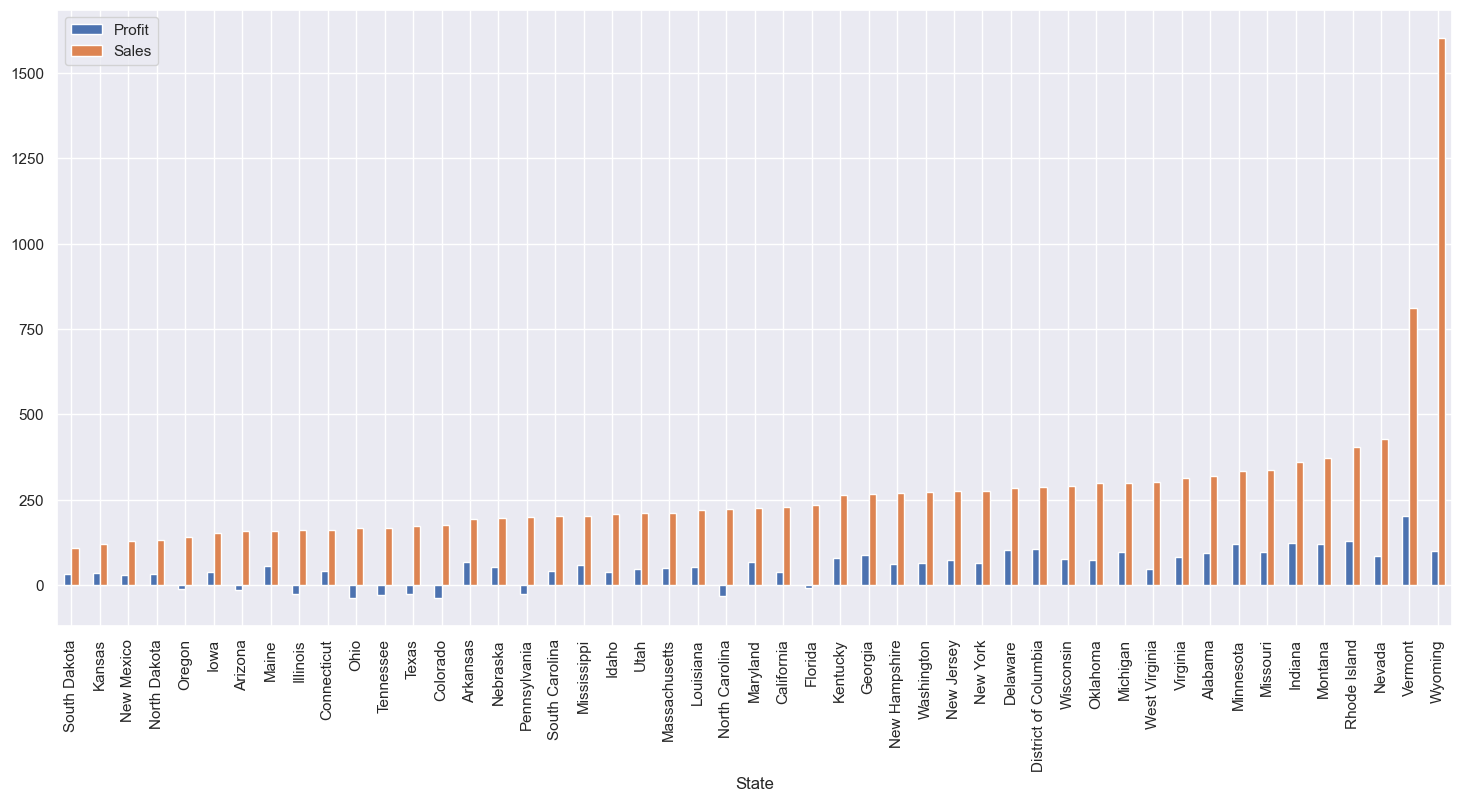

In [90]:
#sorted by sales
data_state.sort_values('Sales')[['Profit','Sales']].plot(kind='bar', figsize=(18,8))

In [92]:
data_state.sum(axis=0)

Sales       13545.400821
Profit       2648.326892
Discount        4.076661
dtype: float64

In [96]:
data_state['Sales%'] = data_state['Sales']/135.454
data_state['Profit%'] = data_state['Profit']/26.483

In [98]:
data_state.sort_values('Profit%')

,Sales,Profit,Discount,Sales%,Profit%
State,,,,,
Ohio,166.861697,-36.186304,0.324947,1.231870,-1.366397
Colorado,176.418231,-35.867351,0.316484,1.302422,-1.354354
North Carolina,223.305880,-30.083985,0.283534,1.648574,-1.135973
Tennessee,167.551219,-29.189583,0.291257,1.236960,-1.102201
Pennsylvania,198.487077,-26.507598,0.328620,1.465347,-1.000929
Texas,172.779742,-26.121174,0.370193,1.275560,-0.986337
Illinois,162.939230,-25.625787,0.390041,1.202912,-0.967632
Arizona,157.508933,-15.303235,0.303571,1.162822,-0.577851
Oregon,140.573790,-9.600569,0.288710,1.037797,-0.362518


In [ ]:
#Analysis base on region

<Axes: xlabel='count', ylabel='Region'>

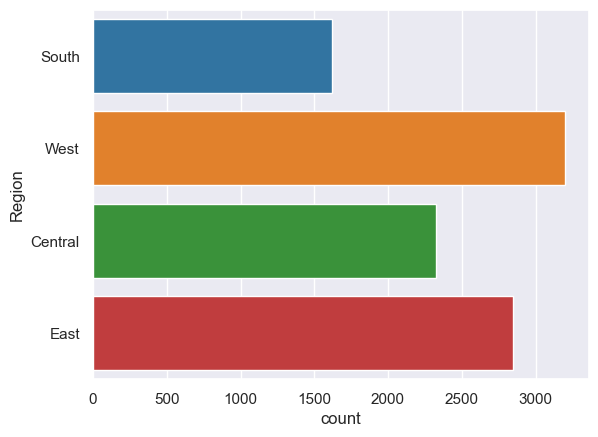

In [100]:
sns.countplot(data['Region'], palette='tab10')

In [106]:
data_region2 = data.groupby(['Region'])[['Sales','Profit']].mean()

In [108]:
data_region2

,Sales,Profit
Region,,
Central,215.772661,17.092709
East,238.336110,32.135808
South,241.803645,28.857673
West,226.488028,33.836821


array([<Axes: ylabel='Sales'>, <Axes: ylabel='Profit'>], dtype=object)

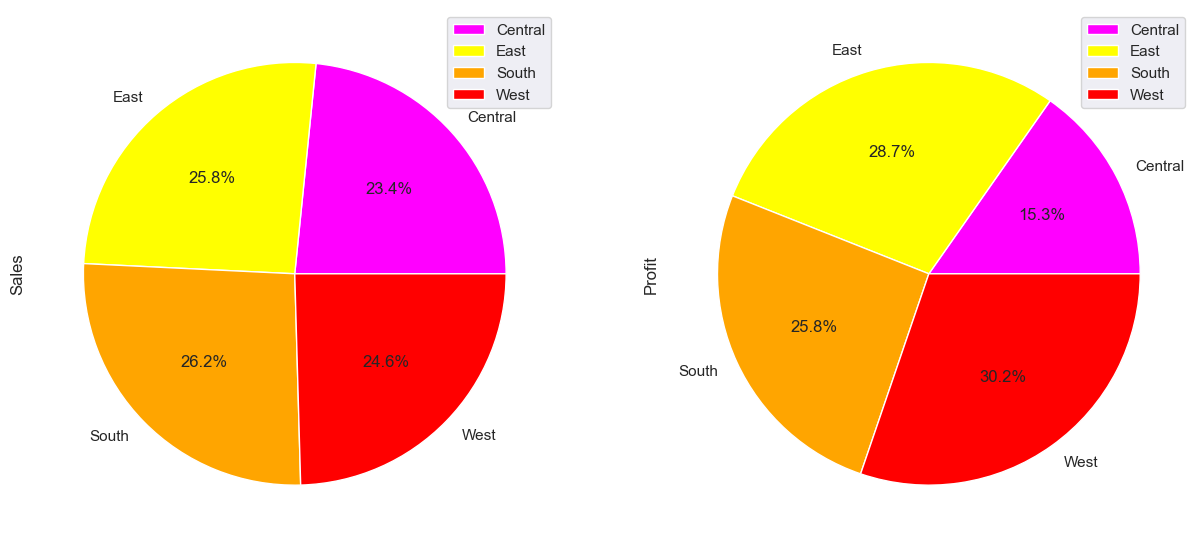

In [110]:
data_region2.plot.pie(subplots=True, figsize=(15,7), autopct='%1.1f%%', label=data_region2.index.values, colors=colors_4)

In [112]:
data_region2.sum(axis=0)

Sales     922.400443
Profit    111.923010
dtype: float64

In [116]:
data_region2['Sales%'] = data_region2['Sales']/9.224
data_region2['Profit%'] = data_region2['Profit']/1.119

In [120]:
data_region2.sort_values('Profit')

,Sales,Profit,Sales%,Profit%
Region,,,,
Central,215.772661,17.092709,23.392526,15.274986
South,241.803645,28.857673,26.214619,25.788805
East,238.336110,32.135808,25.838694,28.718327
West,226.488028,33.836821,24.554209,30.238446


In [ ]:
#Analysis of sub category

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600')])

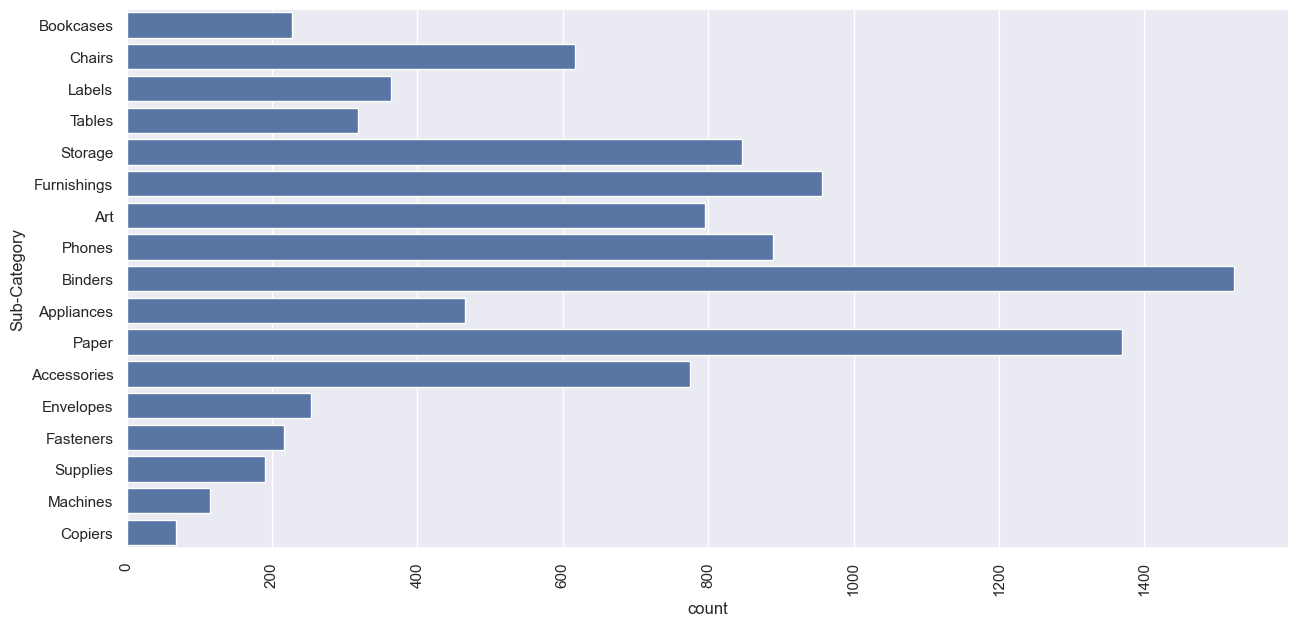

In [122]:
plt.figure(figsize=(15,7))
sns.countplot(data['Sub-Category'])
plt.xticks(rotation=90)

In [124]:
data_subcat = data.groupby(['Sub-Category'])[['Sales','Profit']].mean()

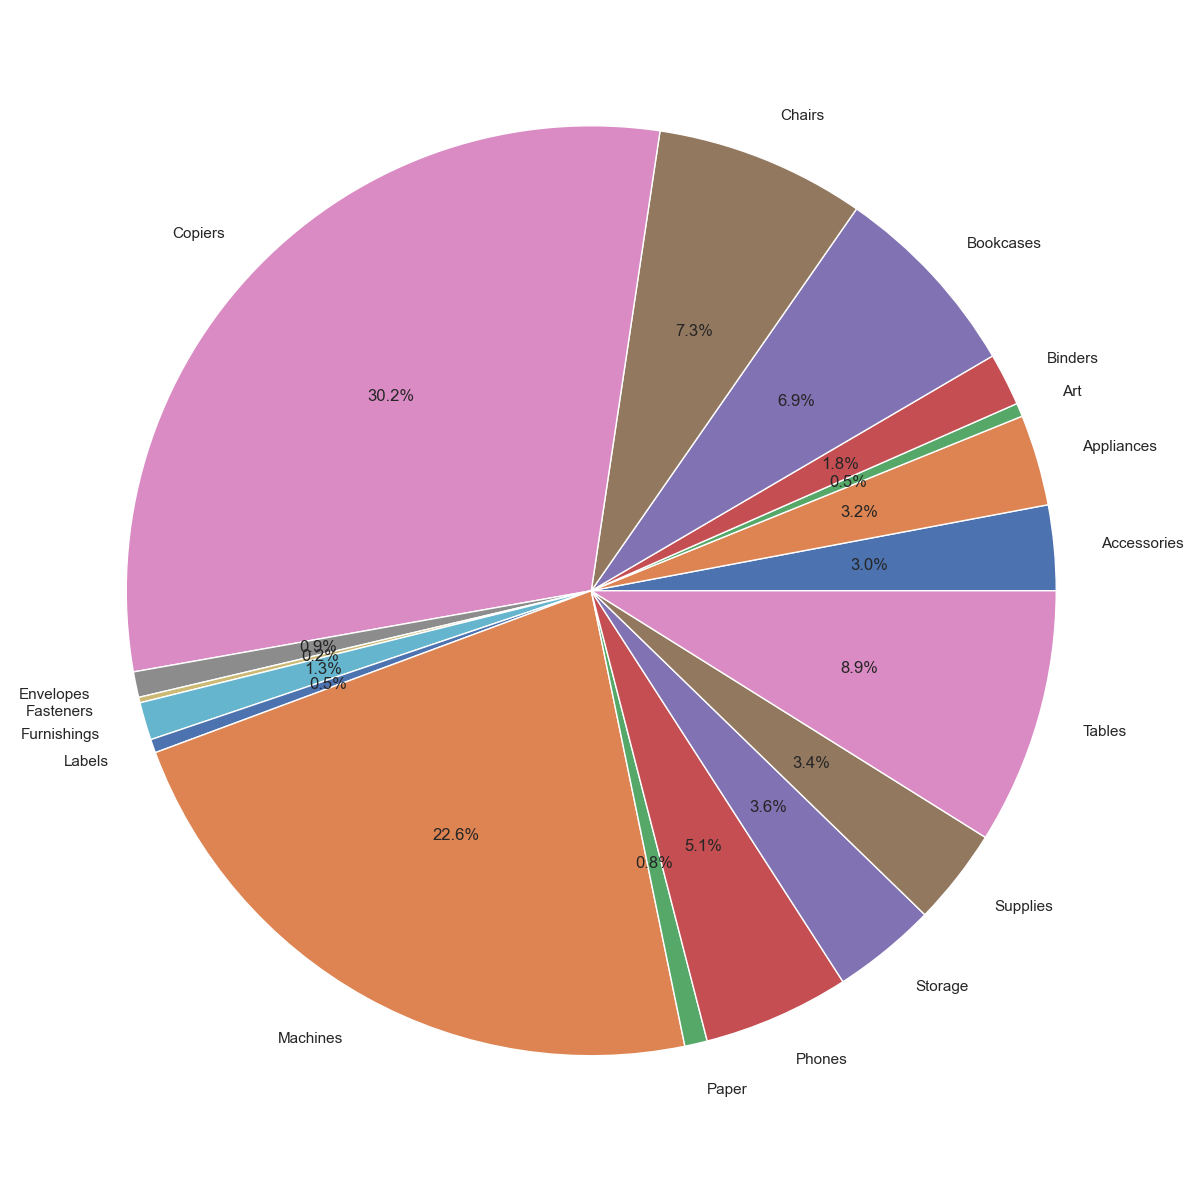

In [126]:
plt.figure(figsize=(15,18))
plt.pie(data_subcat['Sales'], labels = data_subcat.index, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Sub-Category'>

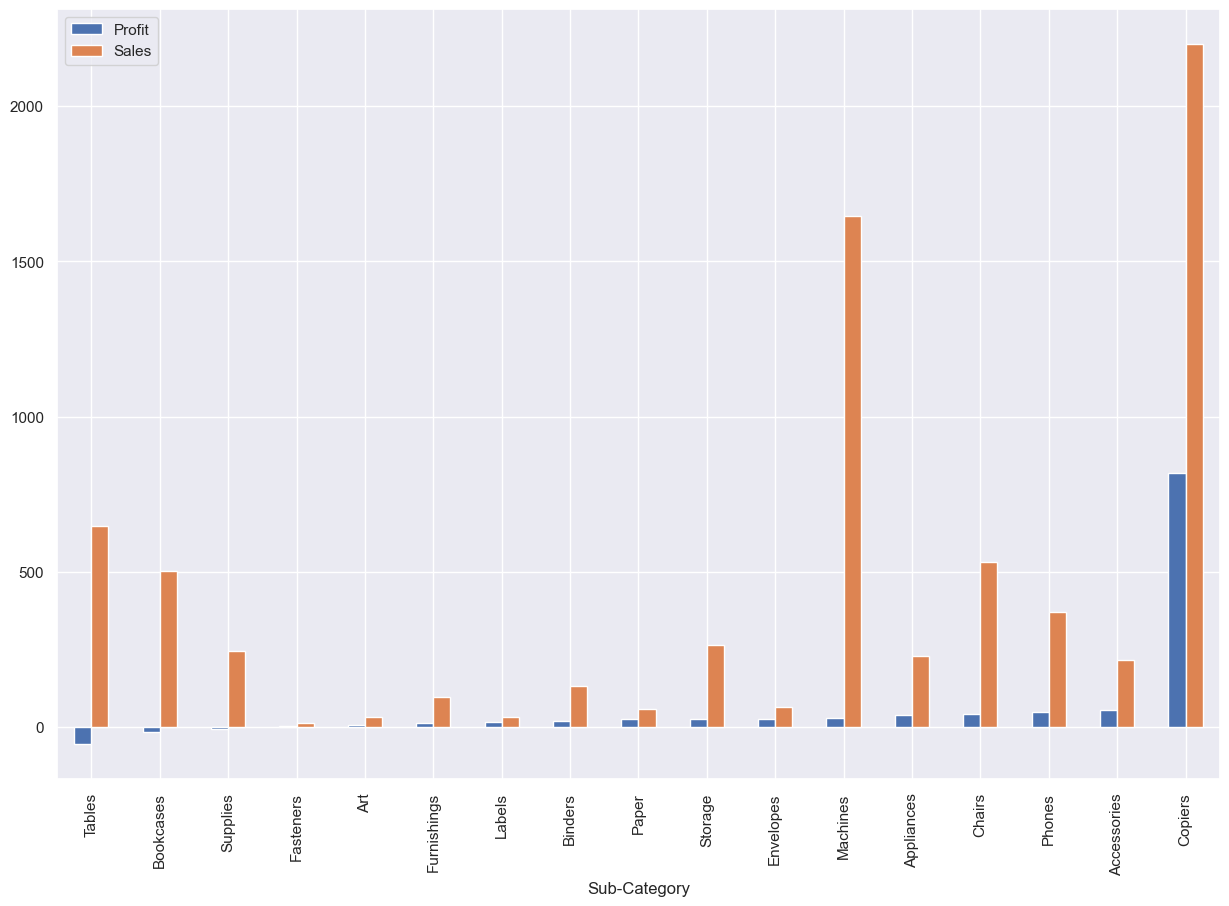

In [128]:
data_subcat.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(15,10))

In [130]:
data_subcat.sum(axis=0)

Sales     7291.484388
Profit    1095.148131
dtype: float64

In [132]:
data_subcat['Sales%'] = data_subcat['Sales']/72.915
data_subcat['Profit%'] = data_subcat['Profit']/10.952

In [134]:
data_subcat.sort_values('Sales')

,Sales,Profit,Sales%,Profit%
Sub-Category,,,,
Fasteners,13.936774,4.375660,0.191137,0.399531
Art,34.068834,8.200737,0.467240,0.748789
Labels,34.303055,15.236962,0.470453,1.391249
Paper,57.284092,24.856620,0.785628,2.269596
Envelopes,64.867724,27.418019,0.889635,2.503471
Furnishings,95.825668,13.645918,1.314211,1.245975
Binders,133.560560,19.843574,1.831730,1.811868
Accessories,215.974604,54.111788,2.962005,4.940813
Appliances,230.729034,38.849586,3.164356,3.547259
